In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("IDSgithub/files/ch04/ACCIDENTS_GU_BCN_2013.csv",encoding='latin-1')
print(data.columns)

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')


In [3]:
data['Date']='2013-'+data['Mes de any'].apply(lambda x:str(x))+'-'+data['Dia de mes'].apply(lambda x:str(x))
data['Date']=pd.to_datetime(data['Date'])
accidents=data.groupby(['Date']).size()
print('Mean: ', accidents.mean())

Mean:  25.90958904109589


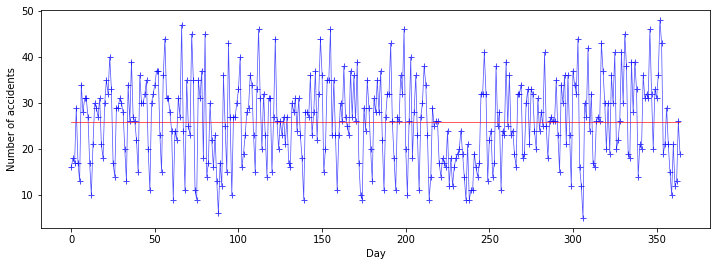

In [4]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
plt.ylabel('Number of accidents')
plt.xlabel('Day')
plt.plot(range(0,365),np.array(accidents),'b-+',lw=0.7,alpha=0.7)
plt.plot(range(0,365),[accidents.mean()]*365,'r-',lw=0.7,alpha=0.9)
plt.show()

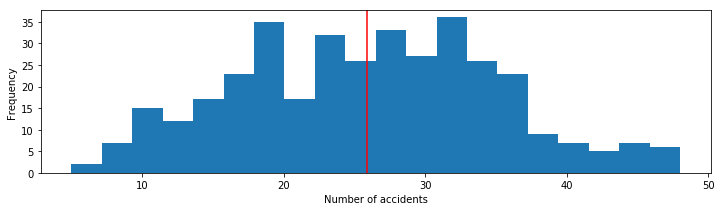

In [5]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
plt.ylabel('Frequency')
plt.xlabel('Number of accidents')
plt.hist(np.array(accidents),bins=20)
ax.axvline(x=accidents.mean(),ymin=0,ymax=40,color=[1,0,0])
plt.savefig("bootmean.png",dpi=300,bbox_inches='tight')
plt.show()

In [6]:
print("Mean: ",accidents.mean(),"Standard Deviation: ",accidents.std())

Mean:  25.90958904109589 Standard Deviation:  9.108324962464705


In [7]:
df=accidents.to_frame()
N_test=10000
elements=200
means=[0]*N_test
for i in range(N_test):
    rows=np.random.choice(df.index.values,elements)
    sampled_df=df.loc[rows]
    means[i]=sampled_df.mean()

In [8]:
rows=np.random.choice(df.index.values,200)
sampled_df=df.loc[rows]
est_sigma_mean=sampled_df.std()/math.sqrt(200)
print('Direct estimation of SE from one sample of 200 elements',est_sigma_mean[0])
print('Estimating of the SE by simulating 10000 samples of 200 elements: ',np.array(means).std())

Direct estimation of SE from one sample of 200 elements 0.7058719081772336
Estimating of the SE by simulating 10000 samples of 200 elements:  0.6436067883226527


In [9]:
def meanBootstrap(X,numberb):
    x=[0]*numberb
    for i in range(numberb):
        sample=[X[j] for j in np.random.randint(len(X),size=len(X))]
        x[i]=np.mean(sample)
    return x
m=meanBootstrap(accidents,10000)
print("Mean estimate: ",np.mean(m))

Mean estimate:  25.913223561643836


In [10]:
m=accidents.mean()
se=accidents.std()/math.sqrt(len(accidents))
ci=[m-se*1.96,m+se*1.96]
print("Confidence Interval: ",ci)

Confidence Interval:  [24.975156065800284, 26.8440220163915]


In [11]:
m=meanBootstrap(accidents,10000)
sample_mean=np.mean(m)
sample_se=np.std(m)
print("Mean estimate: ",sample_mean)
print("SE of the estimate: ",sample_se)
ci=[np.percentile(m,2.5),np.percentile(m,97.5)]
print("Confidence Interval:",ci)

Mean estimate:  25.909587671232874
SE of the estimate:  0.47970894331118935
Confidence Interval: [24.967054794520546, 26.849383561643837]


In [12]:
data=pd.read_csv("IDSgithub/files/ch04/ACCIDENTS_GU_BCN_2010.csv",encoding='latin-1')
data['Date']='2013-'+data['Mes de any'].apply(lambda x:str(x))+'-'+data['Dia de mes'].apply(lambda x:str(x))
data2=data['Date']
counts2010=data['Date'].value_counts()
print('2010: Mean',counts2010.mean())
data=pd.read_csv("IDSgithub/files/ch04/ACCIDENTS_GU_BCN_2013.csv",encoding='latin-1')
data['Date']='2013-'+data['Mes de any'].apply(lambda x:str(x))+'-'+data['Dia de mes'].apply(lambda x:str(x))
data2=data['Date']
counts2013=data['Date'].value_counts()
print('2013: Mean',counts2013.mean())

2010: Mean 24.81095890410959
2013: Mean 25.90958904109589


In [13]:
n=len(counts2013)
mean=counts2013.mean()
s=counts2013.std()
ci=[mean-s*1.96/np.sqrt(n),mean+s*1.96/np.sqrt(n)]
print('2010 accident rate estimate: ',counts2010.mean())
print('2013 accident rate estimate: ',counts2013.mean())
print('CI for 2013: ',ci)

2010 accident rate estimate:  24.81095890410959
2013 accident rate estimate:  25.90958904109589
CI for 2013:  [24.975156065800284, 26.8440220163915]


In [14]:
m=len(counts2010)
n=len(counts2013)
p=(counts2013.mean()-counts2010.mean())
print('m: ',m,'n: ',n)
print('Mean Difference: ',p)


m:  365 n:  365
Mean Difference:  1.0986301369863014


In [15]:
x=counts2010
y=counts2013
pool=np.concatenate([x,y])
np.random.shuffle(pool)
import random
N=10000
diff=list(range(N))
for i in range(N):
    p1=[random.choice(pool) for _ in list(range(n))]
    p2=[random.choice(pool) for _ in list(range(n))]
    diff[i]=(np.mean(p1)-np.mean(p2))

In [16]:
diff2=np.array(diff)
w1=np.where(diff2>p)[0]
print('p-value (Simulation) = ',len(w1)/float(N),'(',len(w1)/float(N)*100,'% ), ','Difference = ',p)
if(len(w1)/float(N))<0.05:
    print('The effect is likely')
else:
    print('The effect is unlikely')

p-value (Simulation) =  0.0469 ( 4.6899999999999995 % ),  Difference =  1.0986301369863014
The effect is likely
